# Categorizing Price Variable

The idea here is to categorize price to be able to classify it into 3 groups:
1. Low range
2. Mid range
3. High range

We could have used our knowledge of the market prices for used-cars to arrive at the price range for each category. Instead we use k-means clustering to group the price data points.

This may be used in the next stage where we perform clustering of the independent variables and try to determine the price bracket to which each cluster falls.


In [7]:
# Imports

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Define the number of clusters K
K = 3

# Use the sampled data
data = pd.read_csv('../data/used_cars_data.csv')

# data['log_price'] = np.log(data['price'])

# Get the price column
# Reshape required since clustering applied to just 1 column
price_values = data['price'].values.reshape(-1, 1)

# Create K-Means model
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20)

# Fit the model to the price data
kmeans.fit(price_values)

# Fetch the cluster labels for each data point
cluster_labels = kmeans.labels_

# New column price_category that stores cluster labels
data['price_category'] = cluster_labels


22908 [0]
69476 [1]
162 [2]


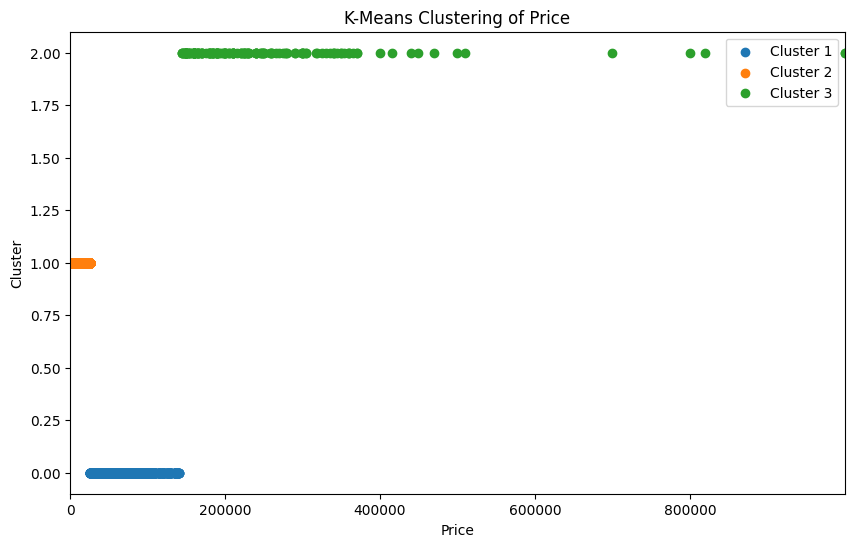

In [9]:
plt.figure(figsize=(10, 6))
for cluster in range(K):
    cluster_data = data[data['price_category'] == cluster]
    print(len(cluster_data), [cluster])
    plt.scatter(cluster_data['price'], [cluster] * len(cluster_data), label=f'Cluster {cluster + 1}')

# Set x axis limits
# plt.xlim(min(data['price']), max(data['price']))
plt.xlim(0, 999999)

plt.xlabel('Price')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of Price')
plt.legend()
plt.show()



In [10]:
data.head()

,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,frame_damaged,fuel_type,has_accidents,highway_fuel_economy,...,model_name,owner_count,price,theft_title,transmission_display,trim_name,wheel_system,year,torque,price_category
0,SUV / Crossover,Venice,14.0,68,4000.0,I6,False,Gasoline,True,18.0,...,Wrangler,3.0,16499.0,False,5-Speed Manual,Rubicon,4WD,2004,235,1
1,SUV / Crossover,Delaware,15.0,159,3700.0,V6,False,Gasoline,True,21.0,...,Nitro,7.0,2465.0,False,Automatic,SXT 4WD,4WD,2007,235,1
2,Sedan,Montclair,25.0,247,2400.0,I4,False,Gasoline,False,36.0,...,Sonata,1.0,12499.0,False,Automatic,SE FWD,FWD,2017,178,1
3,Sedan,Pawling,27.0,80,1500.0,I4,False,Gasoline,False,36.0,...,Malibu,1.0,16900.0,False,6-Speed Automatic,LT FWD,FWD,2017,184,1
4,Sedan,Mars,20.0,56,3000.0,I6,False,Gasoline,False,28.0,...,7 Series,1.0,59550.0,False,Automatic,740i xDrive AWD,AWD,2020,331,0


In [11]:
cluster_info = []

for cluster in range(K):
    cluster_data = price_values[cluster_labels == cluster]
    #print(cluster_data)
    cluster_mean = np.mean(cluster_data)
    cluster_min = np.min(cluster_data)
    cluster_max = np.max(cluster_data)
    cluster_len = len(cluster_data)
    cluster_info.append({
        'Cluster': cluster + 1,
        'Mean Price': cluster_mean,
        'Min Price': cluster_min,
        'Max Price': cluster_max,
        'Cluster Size' : cluster_len
    })

# Sort the cluster info by mean price
cluster_info.sort(key=lambda x: x['Mean Price'])

# Assign categories of low, medium, and high based on the cluster information
for i, cluster in enumerate(cluster_info):
    if i == 0:
        category = 'Low Price'
    elif i == K - 1:
        category = 'High Price'
    else:
        a = str(i)
        category = 'Medium Price '+a
    cluster['Category'] = category


In [12]:
print(cluster_info)

data.to_csv('../data/pre_encoded_price_categorized.csv', index=False)

[{'Cluster': 2, 'Mean Price': 15764.792096263458, 'Min Price': 484.0, 'Max Price': 26398.0, 'Cluster Size': 69476, 'Category': 'Low Price'}, {'Cluster': 1, 'Mean Price': 37033.97072682032, 'Min Price': 26399.0, 'Max Price': 140997.0, 'Cluster Size': 22908, 'Category': 'Medium Price 1'}, {'Cluster': 3, 'Mean Price': 248819.43827160494, 'Min Price': 144888.0, 'Max Price': 999995.0, 'Cluster Size': 162, 'Category': 'High Price'}]


## Categories

- Low range: 484 - 26405 (69504 data points in sample)
- Mid range: 26410 - 140997 (22881 data points)
- High range: 144888 - 999995 (162 data points)

## Note

We may also use these categories as a new categorical variable in the dataset for stratified sampling to split the dataset into training and test sets.

If K = 6

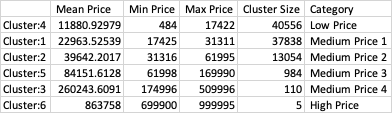